In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [1]:
import keras
impo

print(keras.__version__)

3.5.0


In [9]:
import os
res = os.system("pip show")

In [10]:
res

1

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 30

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage', 
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [8]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

In [17]:
#here we have loaded the downloaded dataset as batches
#i.e., 68 batches
#in each batch 32 images are present

In [10]:
num = 1
for image_batch, label_batch in dataset:
    print(image_batch.shape)
    print(label_batch.numpy())
    print(num)
    num += 1

(32, 256, 256, 3)
[1 2 1 0 0 1 1 0 1 0 2 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 2 1 1 0 0 1]
1
(32, 256, 256, 3)
[1 1 0 0 1 1 1 1 0 0 1 2 0 0 1 0 0 2 1 1 1 0 1 0 1 0 0 1 1 2 1 1]
2
(32, 256, 256, 3)
[2 0 1 0 0 1 0 2 0 1 1 0 1 1 1 1 0 0 1 1 1 0 2 0 0 0 0 1 0 1 1 1]
3
(32, 256, 256, 3)
[0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0]
4
(32, 256, 256, 3)
[1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0]
5
(32, 256, 256, 3)
[0 0 0 1 1 0 1 1 1 1 2 1 0 0 1 0 1 2 0 1 0 1 2 1 0 1 1 1 0 0 0 0]
6
(32, 256, 256, 3)
[1 1 1 1 0 0 0 2 1 1 1 0 1 2 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0]
7
(32, 256, 256, 3)
[2 0 1 0 1 0 2 1 0 1 2 0 1 0 1 0 0 0 1 1 2 1 1 0 1 1 1 0 0 0 1 1]
8
(32, 256, 256, 3)
[0 0 1 2 1 1 0 0 0 0 0 1 0 1 0 1 0 1 2 0 1 0 1 0 0 0 0 0 0 1 1 1]
9
(32, 256, 256, 3)
[0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 2 0 1 2 0 1 0 1 0]
10
(32, 256, 256, 3)
[0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 2]
11
(32, 256, 256, 3)
[1 1 1 0 2 0 0 1 1 2 1 0 2 1 2 0 0

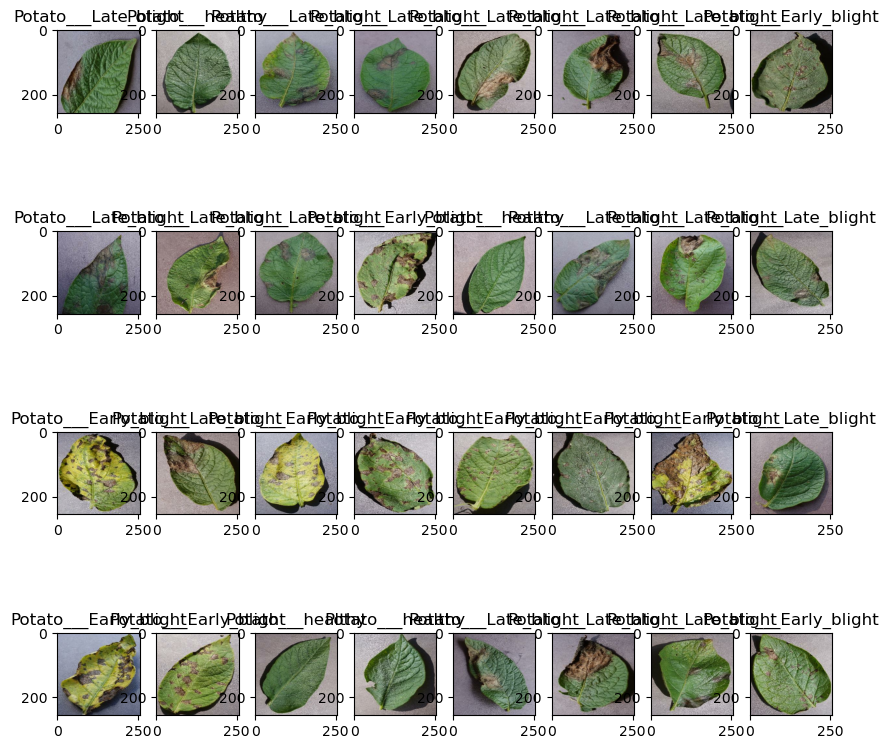

In [12]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(32):
        ax = plt.subplot(4,8,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        #print(image_batch[i].numpy().shape)
        plt.title(class_names[label_batch[i]])
    

#train_test_split
80% --- training
20% --- 10% test & 10% validation

In [13]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [14]:
train_ds = dataset.take(54)
len(train_ds)

54

In [15]:
testAndVal = dataset.skip(54)
len(testAndVal)

14

In [16]:
val_size, test_size = 0.1, 0.1
len(dataset) * val_size

6.800000000000001

In [17]:
val_ds = testAndVal.take(6)
test_ds = testAndVal.skip(6)
len(test_ds)

8

In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [36]:
model = models.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),  # Explicit input layer
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))  # Include batch dimension here


In [39]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_56 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_58 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_60 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_59 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_60 (MaxPooling2D)      │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile (
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [42]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4569 - loss: 0.9208 - val_accuracy: 0.6510 - val_loss: 0.6876
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6899 - loss: 0.6888 - val_accuracy: 0.7031 - val_loss: 0.6788
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8451 - loss: 0.3783 - val_accuracy: 0.8229 - val_loss: 0.3775
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.8919 - loss: 0.2983 - val_accuracy: 0.8490 - val_loss: 0.3604
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9091 - loss: 0.2561 - val_accuracy: 0.8646 - val_loss: 0.3815
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.9093 - loss: 0.2327 - val_accuracy: 0.9115 - val_loss: 0.1928
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.9341 - loss: 0.1685 - val_accuracy: 0.9479 - val_loss: 0.1857
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9402 - loss: 0.1639 - val_accuracy: 0.9167 - val_loss:

In [44]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.9824 - loss: 0.0431


In [46]:
scores #[loss, accuracy]

[0.08324500918388367, 0.9655172228813171]

In [48]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [49]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [54]:
history.history.items()

dict_items([('accuracy', [0.5434027910232544, 0.7309027910232544, 0.8443287014961243, 0.8964120149612427, 0.9016203880310059, 0.9247685074806213, 0.9357638955116272, 0.9334490895271301, 0.9502314925193787, 0.9375, 0.9502314925193787, 0.9525462985038757, 0.9606481194496155, 0.9664351940155029, 0.9681712985038757, 0.9756944179534912, 0.9652777910232544, 0.9728009104728699, 0.9768518805503845, 0.9641203880310059, 0.9751157164573669, 0.9681712985038757, 0.9814814925193787, 0.9809027910232544, 0.9855324029922485, 0.9809027910232544, 0.9820601940155029, 0.9814814925193787, 0.9942129850387573, 0.9855324029922485]), ('loss', [0.8354419469833374, 0.6065773367881775, 0.3818207383155823, 0.28230398893356323, 0.2508721351623535, 0.19562965631484985, 0.16506358981132507, 0.1719193309545517, 0.12404914945363998, 0.1614266186952591, 0.12897096574306488, 0.12681639194488525, 0.10756158083677292, 0.09855269640684128, 0.10230623930692673, 0.06213102489709854, 0.09024640172719955, 0.06807480752468109, 0.

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

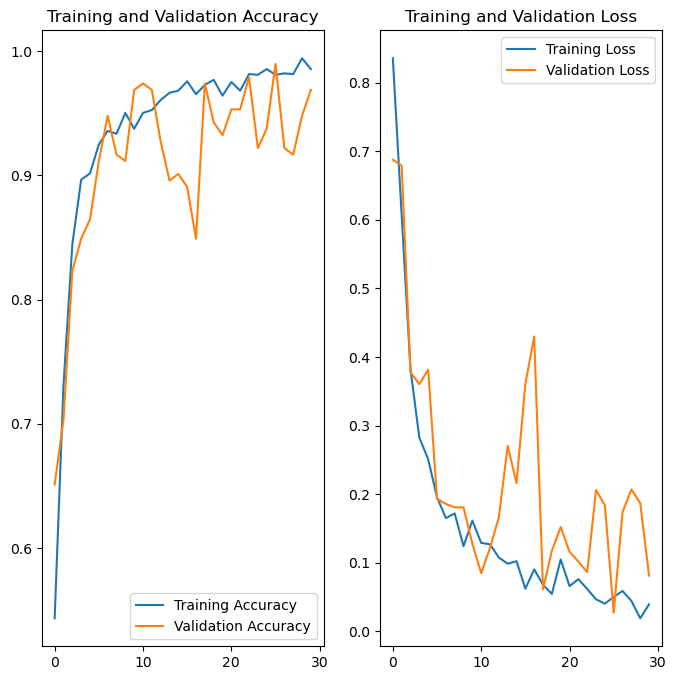

In [56]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
predicted label: Potato___Early_blight


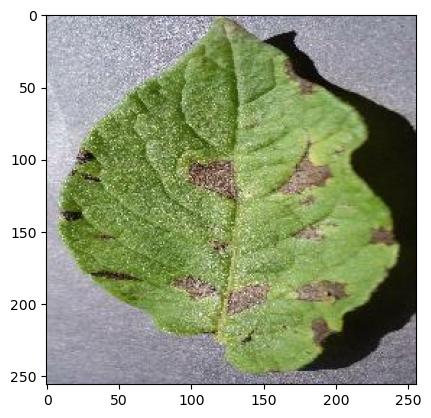

In [60]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [61]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


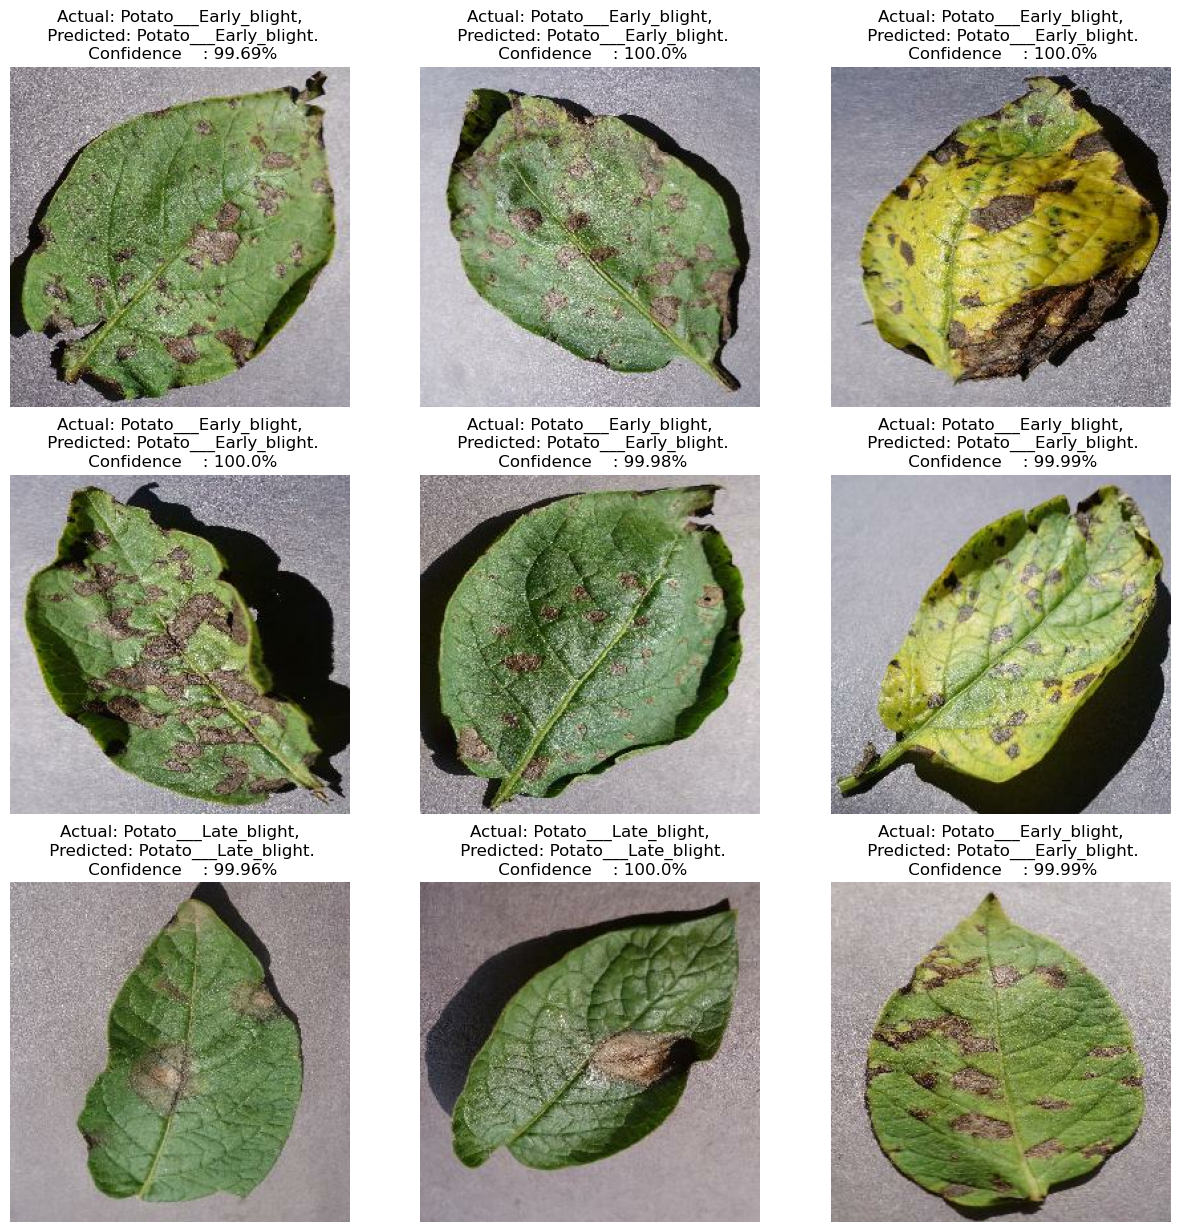

In [63]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence    : {confidence}%")
        
        plt.axis("off")

In [ ]:
#saved the model

In [67]:
model_version = 1
model.save(f"../models/{model_version}.keras")  # Recommended
